<a href="https://colab.research.google.com/github/KaueAbbe/Analise_ChurnRate/blob/main/3.Modelo%20Machine%20Learning/Modelo_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red' size = 10 > Modelo de Classificação </font>
#### **Autor:** Kaue Hermann Abbehausen
#### **Linkedin:** https://www.linkedin.com/in/kaue-abbehausen-5b1922165/
## <font color = 'green'> Contextualizando</font>
Eu atuo como cientista de dados pela operadora de telecomunicações Alura Voz. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se reduzir a Taxa de Evasão de Clientes, conhecido como **Churn Rate**. Basicamente, o **Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.**

Eu sugeri, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, expliquei que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.

Assim, solicitei o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

* **Os dados foram retirados de uma API e podem ser encontrado no link abaixo:**

https://github.com/sthemonica/alura-voz/blob/main/Dados/Telco-Customer-Churn.json

* **Os dados foram tratados no arquivo Semana 1 e são encontrados no link abaixo:**

https://github.com/KaueAbbe/Challenge_Data_Science1_Alura  
* Versão Raw

https://raw.githubusercontent.com/KaueAbbe/Challenge_Data_Science1_Alura/main/Telco-Customer-Churn-Corrigido.json


* **A análise exploratório dos dados foi feita na semana 2.E agora é o momento de criar um modelo de machine learning em que é possível prever quais os clientes que podem vir a evadir da empresa AluraVoz**

## **Resultados da Análise exploratória**

Durante a análise exploratória foram encontrados variáveis que apresentam diferença entre os grupos que evadiram e que não evadiram. Para as variáveis do tipo qualitativas (categóricas) temos:

 Desta lista de variáveis categóricas apenas Idoso, Parceiro, dependencia, Fatura_online, servico_internet, assinatura_tv e assinatura_filme são de duas categorias (sim ou não).

 # Importando as bibliotecas e os dados

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_json('https://raw.githubusercontent.com/KaueAbbe/Challenge_Data_Science1_Alura/main/Telco-Customer-Churn-Corrigido.json')
dados.head()

,IDcliente,Evadiu,Genero,Idoso,Parceiro,Dependencia,Meses_de_contrato,Servico_celular,linhas_multiplas,Tipo_contrato,...,Gasto_mensal,Gasto_total,Servico_internet,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,Anual,...,65.6,593.30,DSL,Nao,Sim,Nao,Sim,Sim,Nao,2.186667
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,Mes a Mes,...,59.9,542.40,DSL,Nao,Nao,Nao,Nao,Nao,Sim,1.996667
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Mes a Mes,...,73.9,280.85,Fibra optica,Nao,Nao,Sim,Nao,Nao,Nao,2.463333
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Mes a Mes,...,98.0,1237.85,Fibra optica,Nao,Sim,Sim,Nao,Sim,Sim,3.266667
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Mes a Mes,...,83.9,267.40,Fibra optica,Nao,Nao,Nao,Sim,Sim,Nao,2.796667


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IDcliente             7043 non-null   object 
 1   Evadiu                7043 non-null   object 
 2   Genero                7043 non-null   object 
 3   Idoso                 7043 non-null   object 
 4   Parceiro              7043 non-null   object 
 5   Dependencia           7043 non-null   object 
 6   Meses_de_contrato     7043 non-null   int64  
 7   Servico_celular       7043 non-null   object 
 8   linhas_multiplas      7043 non-null   object 
 9   Tipo_contrato         7043 non-null   object 
 10  Fatura_online         7043 non-null   object 
 11  Metodo_pagamento      7043 non-null   object 
 12  Gasto_mensal          7043 non-null   float64
 13  Gasto_total           7043 non-null   float64
 14  Servico_internet      7043 non-null   object 
 15  Seguranca_online     

# Preparar os dados para o modelo
1. Tirar colunas altamente correlacionadas
2. Enconde dos dados
3. Balancear os dados
4. Standard Scalar

### 1 Visualizar colunas altamente correlacionadas

<ipython-input-71-3c0e1fc7d43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dados.corr())


<Axes: >

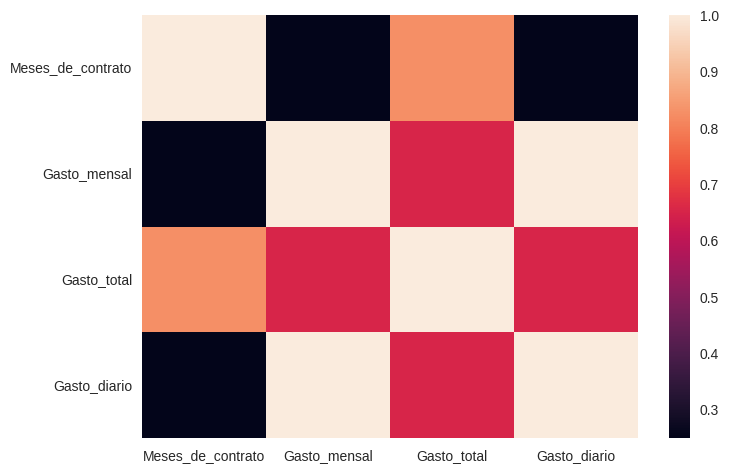

In [ ]:
sns.heatmap(dados.corr())

### 2. Mudança de binários para 1 e 0

In [ ]:
for i in dados.select_dtypes(include=['object']).columns:
    if len(dados[i].unique()) > 2:
       print(f"{i}: {dados[i].unique()}")

IDcliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
linhas_multiplas: ['Nao' 'Sim' 'Sem servico celular']
Tipo_contrato: ['Anual' 'Mes a Mes' 'Bianual']
Metodo_pagamento: ['Cheque por Email' 'Cheque Eletronico' 'Cartao Credito (automatico)'
 'Transferencia Bancaria (automatico)']
Servico_internet: ['DSL' 'Fibra optica' 'Nao']
Seguranca_online: ['Nao' 'Sim' 'Sem servico internet']
Backup_online: ['Sim' 'Nao' 'Sem servico internet']
Protecao_de_aparelho: ['Nao' 'Sim' 'Sem servico internet']
Suporte_tecnico: ['Sim' 'Nao' 'Sem servico internet']
Assinatura_tv: ['Sim' 'Nao' 'Sem servico internet']
Assinatura_filme: ['Nao' 'Sim' 'Sem servico internet']


In [ ]:
colunas = ['Metodo_pagamento', 'Tipo_contrato', 'Servico_internet']

In [ ]:
dados2 = dados.drop(colunas, axis = 1)
dados2.columns

Index(['IDcliente', 'Evadiu', 'Genero', 'Idoso', 'Parceiro', 'Dependencia',
       'Meses_de_contrato', 'Servico_celular', 'linhas_multiplas',
       'Fatura_online', 'Gasto_mensal', 'Gasto_total', 'Seguranca_online',
       'Backup_online', 'Protecao_de_aparelho', 'Suporte_tecnico',
       'Assinatura_tv', 'Assinatura_filme', 'Gasto_diario'],
      dtype='object')

In [ ]:
dicionario = {'Sem servico internet':0,
              'Sem servico celular': 0,
              'Nao': 0,
              'Sim': 1,
              'Homem':0,
              'Mulher':1}

In [ ]:
dados2 = dados2.replace(dicionario)
dados2.head()

,IDcliente,Evadiu,Genero,Idoso,Parceiro,Dependencia,Meses_de_contrato,Servico_celular,linhas_multiplas,Fatura_online,Gasto_mensal,Gasto_total,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,65.6,593.30,0,1,0,1,1,0,2.186667
1,0003-MKNFE,0,0,0,0,0,9,1,1,0,59.9,542.40,0,0,0,0,0,1,1.996667
2,0004-TLHLJ,1,0,0,0,0,4,1,0,1,73.9,280.85,0,0,1,0,0,0,2.463333
3,0011-IGKFF,1,0,1,1,0,13,1,0,1,98.0,1237.85,0,1,1,0,1,1,3.266667
4,0013-EXCHZ,1,1,1,1,0,3,1,0,1,83.9,267.40,0,0,0,1,1,0,2.796667


* Não vou adicionar a coluna gasto mensal porque está altamente correlacionada com gasto diário. Vou manter o gasto diário.
### 2 Enconde dos dados

In [ ]:
dados.columns

Index(['IDcliente', 'Evadiu', 'Genero', 'Idoso', 'Parceiro', 'Dependencia',
       'Meses_de_contrato', 'Servico_celular', 'linhas_multiplas',
       'Tipo_contrato', 'Fatura_online', 'Metodo_pagamento', 'Gasto_mensal',
       'Gasto_total', 'Servico_internet', 'Seguranca_online', 'Backup_online',
       'Protecao_de_aparelho', 'Suporte_tecnico', 'Assinatura_tv',
       'Assinatura_filme', 'Gasto_diario'],
      dtype='object')

In [ ]:
dados_encode_cat = pd.get_dummies(dados[colunas])
dados_encode_cat.head(2)

,Metodo_pagamento_Cartao Credito (automatico),Metodo_pagamento_Cheque Eletronico,Metodo_pagamento_Cheque por Email,Metodo_pagamento_Transferencia Bancaria (automatico),Tipo_contrato_Anual,Tipo_contrato_Bianual,Tipo_contrato_Mes a Mes,Servico_internet_DSL,Servico_internet_Fibra optica,Servico_internet_Nao
0,0,0,1,0,1,0,0,1,0,0
1,0,0,1,0,0,0,1,1,0,0


In [ ]:
dados_encode = pd.concat([dados_encode_cat, dados2], axis = 1)
dados_encode.head()

,Metodo_pagamento_Cartao Credito (automatico),Metodo_pagamento_Cheque Eletronico,Metodo_pagamento_Cheque por Email,Metodo_pagamento_Transferencia Bancaria (automatico),Tipo_contrato_Anual,Tipo_contrato_Bianual,Tipo_contrato_Mes a Mes,Servico_internet_DSL,Servico_internet_Fibra optica,Servico_internet_Nao,...,Fatura_online,Gasto_mensal,Gasto_total,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
0,0,0,1,0,1,0,0,1,0,0,...,1,65.6,593.30,0,1,0,1,1,0,2.186667
1,0,0,1,0,0,0,1,1,0,0,...,0,59.9,542.40,0,0,0,0,0,1,1.996667
2,0,1,0,0,0,0,1,0,1,0,...,1,73.9,280.85,0,0,1,0,0,0,2.463333
3,0,1,0,0,0,0,1,0,1,0,...,1,98.0,1237.85,0,1,1,0,1,1,3.266667
4,0,0,1,0,0,0,1,0,1,0,...,1,83.9,267.40,0,0,0,1,1,0,2.796667


In [ ]:
dados_encode.columns

Index(['Metodo_pagamento_Cartao Credito (automatico)',
       'Metodo_pagamento_Cheque Eletronico',
       'Metodo_pagamento_Cheque por Email',
       'Metodo_pagamento_Transferencia Bancaria (automatico)',
       'Tipo_contrato_Anual', 'Tipo_contrato_Bianual',
       'Tipo_contrato_Mes a Mes', 'Servico_internet_DSL',
       'Servico_internet_Fibra optica', 'Servico_internet_Nao', 'IDcliente',
       'Evadiu', 'Genero', 'Idoso', 'Parceiro', 'Dependencia',
       'Meses_de_contrato', 'Servico_celular', 'linhas_multiplas',
       'Fatura_online', 'Gasto_mensal', 'Gasto_total', 'Seguranca_online',
       'Backup_online', 'Protecao_de_aparelho', 'Suporte_tecnico',
       'Assinatura_tv', 'Assinatura_filme', 'Gasto_diario'],
      dtype='object')

In [ ]:
dados_encode = dados_encode.drop('IDcliente', axis = 1)
dados_encode.columns

Index(['Metodo_pagamento_Cartao Credito (automatico)',
       'Metodo_pagamento_Cheque Eletronico',
       'Metodo_pagamento_Cheque por Email',
       'Metodo_pagamento_Transferencia Bancaria (automatico)',
       'Tipo_contrato_Anual', 'Tipo_contrato_Bianual',
       'Tipo_contrato_Mes a Mes', 'Servico_internet_DSL',
       'Servico_internet_Fibra optica', 'Servico_internet_Nao', 'Evadiu',
       'Genero', 'Idoso', 'Parceiro', 'Dependencia', 'Meses_de_contrato',
       'Servico_celular', 'linhas_multiplas', 'Fatura_online', 'Gasto_mensal',
       'Gasto_total', 'Seguranca_online', 'Backup_online',
       'Protecao_de_aparelho', 'Suporte_tecnico', 'Assinatura_tv',
       'Assinatura_filme', 'Gasto_diario'],
      dtype='object')

### Balancear os dados
1. Terei que adicionar a variável target.
2. Escolher um método de balanceamente: Undersampling ou Oversampling

In [ ]:
#2- Vou utilizar o Oversampler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
X = dados_encode.drop('Evadiu', axis = 1)
X.head()

,Metodo_pagamento_Cartao Credito (automatico),Metodo_pagamento_Cheque Eletronico,Metodo_pagamento_Cheque por Email,Metodo_pagamento_Transferencia Bancaria (automatico),Tipo_contrato_Anual,Tipo_contrato_Bianual,Tipo_contrato_Mes a Mes,Servico_internet_DSL,Servico_internet_Fibra optica,Servico_internet_Nao,...,Fatura_online,Gasto_mensal,Gasto_total,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
0,0,0,1,0,1,0,0,1,0,0,...,1,65.6,593.30,0,1,0,1,1,0,2.186667
1,0,0,1,0,0,0,1,1,0,0,...,0,59.9,542.40,0,0,0,0,0,1,1.996667
2,0,1,0,0,0,0,1,0,1,0,...,1,73.9,280.85,0,0,1,0,0,0,2.463333
3,0,1,0,0,0,0,1,0,1,0,...,1,98.0,1237.85,0,1,1,0,1,1,3.266667
4,0,0,1,0,0,0,1,0,1,0,...,1,83.9,267.40,0,0,0,1,1,0,2.796667


In [ ]:
Y = dados_encode['Evadiu']
Y.head()

0    0
1    0
2    1
3    1
4    1
Name: Evadiu, dtype: int64

In [ ]:
ros = RandomOverSampler(random_state=42)
X_balanceado, y_balanceado = ros.fit_resample(X, Y)
print(X_balanceado.shape)
print(y_balanceado.shape)

(10348, 27)
(10348,)


In [ ]:
X_balanceado

,Metodo_pagamento_Cartao Credito (automatico),Metodo_pagamento_Cheque Eletronico,Metodo_pagamento_Cheque por Email,Metodo_pagamento_Transferencia Bancaria (automatico),Tipo_contrato_Anual,Tipo_contrato_Bianual,Tipo_contrato_Mes a Mes,Servico_internet_DSL,Servico_internet_Fibra optica,Servico_internet_Nao,...,Fatura_online,Gasto_mensal,Gasto_total,Seguranca_online,Backup_online,Protecao_de_aparelho,Suporte_tecnico,Assinatura_tv,Assinatura_filme,Gasto_diario
0,0,0,1,0,1,0,0,1,0,0,...,1,65.60,593.30,0,1,0,1,1,0,2.186667
1,0,0,1,0,0,0,1,1,0,0,...,0,59.90,542.40,0,0,0,0,0,1,1.996667
2,0,1,0,0,0,0,1,0,1,0,...,1,73.90,280.85,0,0,1,0,0,0,2.463333
3,0,1,0,0,0,0,1,0,1,0,...,1,98.00,1237.85,0,1,1,0,1,1,3.266667
4,0,0,1,0,0,0,1,0,1,0,...,1,83.90,267.40,0,0,0,1,1,0,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,1,0,0,0,1,0,1,0,...,1,96.65,1162.85,0,0,1,0,1,1,3.221667
10344,0,1,0,0,0,0,1,1,0,0,...,0,49.35,219.65,1,0,0,0,0,0,1.645000
10345,1,0,0,0,0,0,1,1,0,0,...,1,40.10,293.30,0,1,0,0,0,1,1.336667
10346,0,1,0,0,0,0,1,0,1,0,...,1,70.10,659.65,0,0,0,0,0,0,2.336667


In [ ]:
y_balanceado.value_counts()

0    5174
1    5174
Name: Evadiu, dtype: int64

### Revendo Correlação

<Axes: >

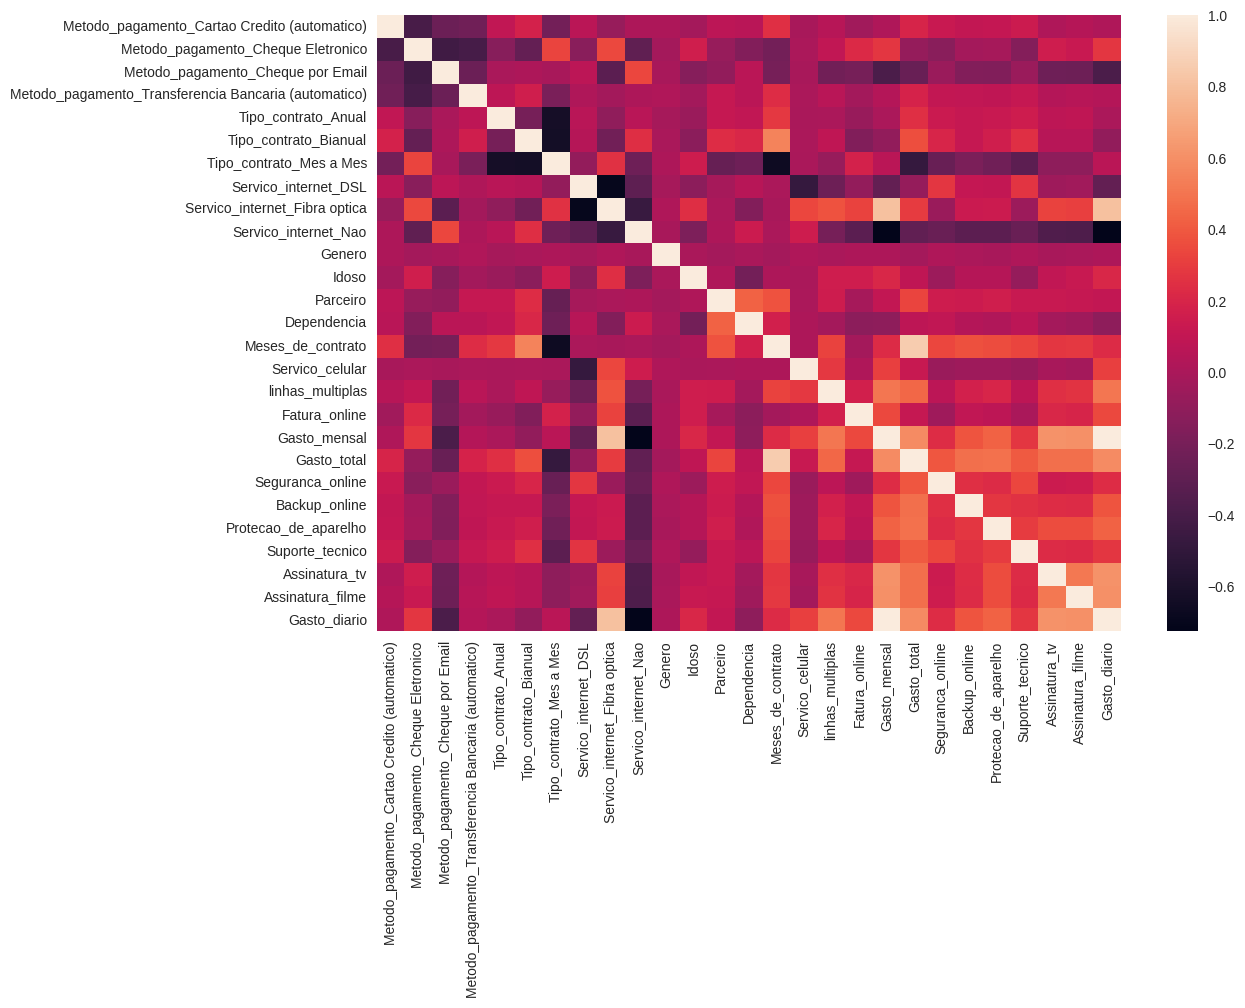

In [ ]:
plt.figure(figsize = (12, 8))
sns.heatmap(X_balanceado.corr())

1. Este gráfico mostra que há correlação alta entre variáveis sem serviço de internet e não tem produto porque não tem serviço de internet. Vamos tirar as colunas de não ter produto porque não tem internet

# Usar Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_balanceado)
X_balanceado = scaler.transform(X_balanceado)

# Separar os dados em treino, teste e validação.
1. Vou separar os dados de treino e de teste.
2. Vou separa os dados de teste em: teste e validação

In [ ]:
#1 - Treino e Teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_balanceado, y_balanceado, test_size = 0.20, random_state = 42)
print(x_treino.shape)
print(y_treino.shape)

(8278, 27)
(8278,)


In [ ]:
print(x_teste.shape)
print(y_teste.shape)

(2070, 27)
(2070,)


In [ ]:
#2 - Teste e Validação
x_teste, x_validacao, y_teste, y_validacao = train_test_split(x_teste, y_teste, test_size = 0.25, random_state = 42)
print(x_teste.shape)
print(y_teste.shape)

(1552, 27)
(1552,)


In [ ]:
print(x_validacao.shape)
print(y_validacao.shape)

(518, 27)
(518,)


In [ ]:
y_treino

4541     0
5709     0
7393     1
10026    1
3578     0
        ..
5734     0
5191     0
5390     0
860      0
7270     1
Name: Evadiu, Length: 8278, dtype: int64

# Criar os Modelos de Classificação e escolher métricas apropriadas

1. Cria a baseline
2. Irei escolher 3 modelos de classificação
3. Escolher a melhor métrica para utilizar
4. Irei treina-los usando Validação Cruzada
5. Escolher melhor modelos para otimização baseando na métrica

### BaseLine
1. Dummy
2. LogisticRegression

In [ ]:
#Função de Classificação com Cross_validate e KFold
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

validador = KFold(n_splits = 5, shuffle = True, random_state = 42)
scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

def cruzada(modelo, x, y, cv):
  resultados = cross_validate(modelo, x, y, cv = cv, scoring= scoring)

  media_acc = round(resultados['test_accuracy'].mean(),3)
  std_acc = round(resultados['test_accuracy'].std(),3)


  media_precision = round(resultados['test_precision'].mean(),3)
  std_precision = round(resultados['test_precision'].std(),3)

  media_recall = round(resultados['test_recall'].mean(),3)
  std_recall = round(resultados['test_recall'].std(),3)

  media_f1 = round(resultados['test_f1_score'].mean(),3)
  std_f1 = round(resultados['test_f1_score'].std(),3)

  print(f"Média de Acurácia: {media_acc}, Desvio Acurácia: {std_acc}")
  print(f"Média de Precisão: {media_precision}, Desvio Precisão: {std_precision}")
  print(f"Média de Recall: {media_recall}, Devio Recall: {std_recall}")
  print(f"Média de F1: {media_f1}, Devio Recall: {std_f1}")

  print('----------------------------TESTES-----------------------')
  modelo.fit(x_treino,y_treino)
  scores = cross_val_score(modelo, x_teste, y_teste, cv =validador, scoring = make_scorer(accuracy_score))
  print(f'Média Acurácia Teste: {round(scores.mean(),2)}')
  scores = cross_val_score(modelo, x_teste, y_teste, cv =validador, scoring = make_scorer(precision_score))
  print(f'Média Precisão Teste: {round(scores.mean(),2)}')

  scores = cross_val_score(modelo, x_teste, y_teste, cv =validador, scoring = make_scorer(recall_score))
  print(f'Média Recall Teste: {round(scores.mean(),2)}')
  return resultados

def matrix_confusao(modelo):
  modelo.fit(x_treino, y_treino)
  y_pred = modelo.predict(x_teste)
  matriz = confusion_matrix(y_teste, y_pred)
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte
  sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Valores Previstos')
  plt.ylabel('Valores Reais')
  plt.show()



In [ ]:
# Dummy
dummy = DummyClassifier(strategy="uniform")
resultados = cruzada(dummy, x_treino, y_treino, validador)




Média de Acurácia: 0.498, Desvio Acurácia: 0.02
Média de Precisão: 0.498, Desvio Precisão: 0.019
Média de Recall: 0.498, Devio Recall: 0.023
Média de F1: 0.498, Devio Recall: 0.018
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.53
Média Precisão Teste: 0.51
Média Recall Teste: 0.5


In [ ]:
from sklearn.linear_model import LogisticRegression

modelo_LR = LogisticRegression()
resultados = cruzada(modelo_LR, x_treino, y_treino, validador)

Média de Acurácia: 0.766, Desvio Acurácia: 0.01
Média de Precisão: 0.743, Desvio Precisão: 0.009
Média de Recall: 0.811, Devio Recall: 0.012
Média de F1: 0.776, Devio Recall: 0.009
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.76
Média Precisão Teste: 0.75
Média Recall Teste: 0.78


#### Usando Feature Importance

/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


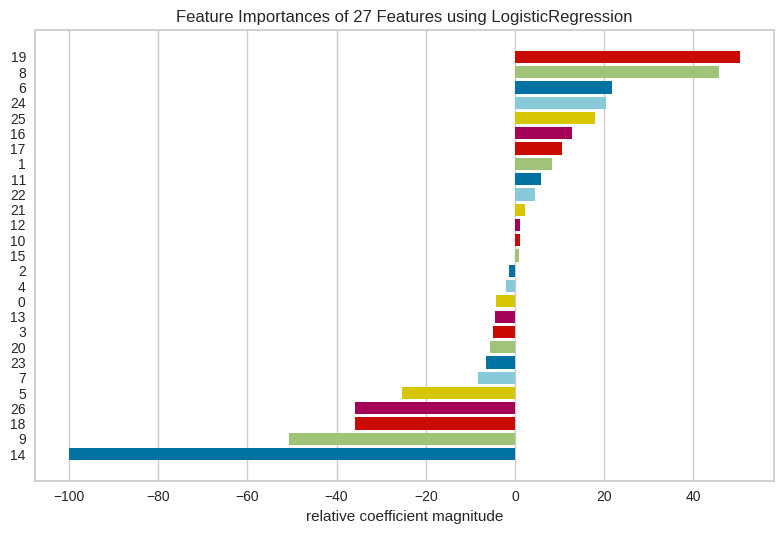

<Axes: title={'center': 'Feature Importances of 27 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(modelo_LR)
viz.fit(x_treino, y_treino)
viz.show()

In [ ]:
df_importances = pd.DataFrame({'feature':viz.features_, 'importances':viz.feature_importances_})
df_importances.query("importances > -5 and importances <5")

,feature,importances
8,3,-4.935734
9,13,-4.482205
10,0,-4.248192
11,4,-2.041511
12,2,-1.296170
13,15,0.873414
14,10,1.017666
15,12,1.108619
16,21,2.203868
17,22,4.414409


In [ ]:
posicoes_retirar = df_importances.query("importances > -15 and importances <15")['feature'].values
posicoes_retirar

array([ 7, 23, 20,  3, 13,  0,  4,  2, 15, 10, 12, 21, 22, 11,  1, 17, 16])

In [ ]:
x_treino_novo = np.delete(x_treino, posicoes_retirar, axis = 1)

In [ ]:
resultados = cruzada(modelo_LR, x_treino_novo, y_treino, validador)

Média de Acurácia: 0.762, Desvio Acurácia: 0.012
Média de Precisão: 0.741, Desvio Precisão: 0.011
Média de Recall: 0.805, Devio Recall: 0.013
Média de F1: 0.771, Devio Recall: 0.011
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.76
Média Precisão Teste: 0.75
Média Recall Teste: 0.78


/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


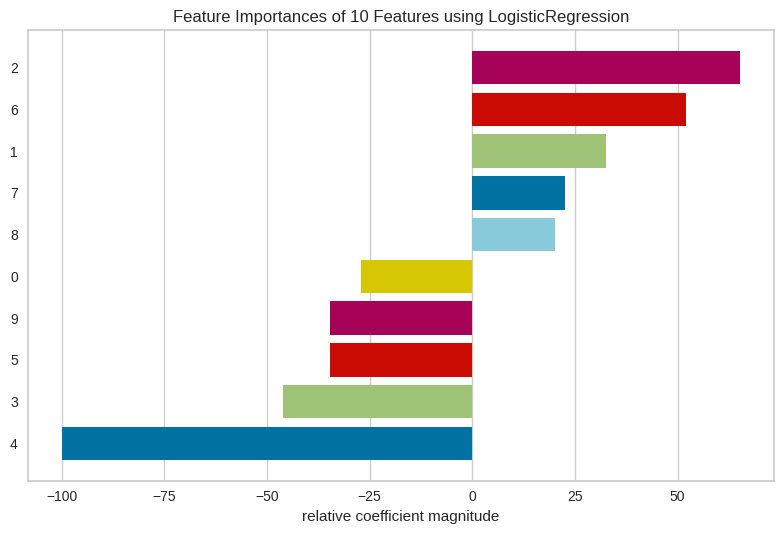

<Axes: title={'center': 'Feature Importances of 10 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [ ]:
modelo_LR = LogisticRegression()
viz = FeatureImportances(modelo_LR)
viz.fit(x_treino_novo, y_treino)
viz.show()

* Não estou vendo diferença entre retirar features com menores coeficientes de magnitude.



> Resultado da BaseLine será o do Regressão Logística:

----------------------------TESTES-----------------------

Média Acurácia Teste: 0.76

Média Precisão Teste: 0.75

Média Recall Teste: 0.78


#### Qual a melhor métrica para utilizar?
* Precision = $\frac{TP}{TP + FP}$ -  Tem foco em dizer quão bem o modelo classifica como positivo.
* Recall = $\frac{TP}{TP + FN}$ -  Tem foco em dizer quão bem o modelo encontra todos os positivos.
* F1_score = $2  \frac{precision * recall}{precision + recall}$ - É a média harmônica entre precision e recall.

**Objetivo**: Classificar qual cliente é um possível evasor. Neste caso é melhor classificar menos FN, porque assim perderemos clientes.

Classificar menos FP significa que não teremos muita dúvida ao classifica um cliente de evasor, porém teremos dúvida quanto a classificá-lo como não evasor.

**Melhor Métrica:** Vou utilizar o Recall para diminuir os Falsos Negativos

## Treinar os Modelos

1. DecisionTreeClassifier
2. AdaBoost
3. BernoulliNB


Média Acurácia Teste: 0.76

Média Precisão Teste: 0.75

Média Recall Teste: 0.78


### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_DT = DecisionTreeClassifier(random_state = 42)

resultados = cruzada(modelo_DT, x_treino, y_treino, validador)

Média de Acurácia: 0.844, Desvio Acurácia: 0.01
Média de Precisão: 0.803, Desvio Precisão: 0.013
Média de Recall: 0.91, Devio Recall: 0.01
Média de F1: 0.853, Devio Recall: 0.01
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.72
Média Precisão Teste: 0.72
Média Recall Teste: 0.73


1. Treino está bem menor do que o teste. Overfitting
2. Valor de teste menor que a baseline

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modelo_AB = AdaBoostClassifier(random_state = 42)

resultados = cruzada(modelo_AB, x_treino, y_treino, validador)

Média de Acurácia: 0.774, Desvio Acurácia: 0.008
Média de Precisão: 0.75, Desvio Precisão: 0.013
Média de Recall: 0.821, Devio Recall: 0.016
Média de F1: 0.783, Devio Recall: 0.01
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.76
Média Precisão Teste: 0.74
Média Recall Teste: 0.79


1. Treino está bem menor do que o teste
2. Valor de teste igual que a baseline




### Bernoulli

* Funciona melhor em dados menos e binários. Para dados não binários há uma transformação em dados binários.

In [ ]:
from sklearn.naive_bayes  import BernoulliNB
modelo_NB = BernoulliNB()

resultados = cruzada(modelo_NB, x_treino, y_treino, validador)

Média de Acurácia: 0.752, Desvio Acurácia: 0.013
Média de Precisão: 0.746, Desvio Precisão: 0.011
Média de Recall: 0.761, Devio Recall: 0.019
Média de F1: 0.754, Devio Recall: 0.014
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.75
Média Precisão Teste: 0.75
Média Recall Teste: 0.74


1. Treino está bem igual do que o teste
2. Valor de teste igual que a baseline

### SVC

In [ ]:
from sklearn.svm import SVC
modelo_SVC = SVC(random_state = 42)

resultados = cruzada(modelo_SVC, x_treino, y_treino, validador)

Média de Acurácia: 0.785, Desvio Acurácia: 0.007
Média de Precisão: 0.759, Desvio Precisão: 0.009
Média de Recall: 0.834, Devio Recall: 0.009
Média de F1: 0.795, Devio Recall: 0.006
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.73
Média Precisão Teste: 0.72
Média Recall Teste: 0.77


1. Treino está maior do que o teste
2. Valor de teste menor que a baseline

#### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_RF = RandomForestClassifier(random_state = 42)

resultados = cruzada(modelo_RF, x_treino, y_treino, validador)


Média de Acurácia: 0.871, Desvio Acurácia: 0.008
Média de Precisão: 0.833, Desvio Precisão: 0.008
Média de Recall: 0.928, Devio Recall: 0.008
Média de F1: 0.878, Devio Recall: 0.007
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.78
Média Precisão Teste: 0.76
Média Recall Teste: 0.8


1. Overfitting
2. Menor que baseline

#### GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_GB = GradientBoostingClassifier(random_state = 42)

resultados = cruzada(modelo_GB, x_treino, y_treino, validador)


Média de Acurácia: 0.785, Desvio Acurácia: 0.011
Média de Precisão: 0.761, Desvio Precisão: 0.014
Média de Recall: 0.831, Devio Recall: 0.016
Média de F1: 0.794, Devio Recall: 0.012
----------------------------TESTES-----------------------
Média Acurácia Teste: 0.75
Média Precisão Teste: 0.73
Média Recall Teste: 0.79


In [ ]:
modelos = ['svc', 'decision tree', 'random forest']
y_pred_treinos = [svc.predict(X_treino), dtree.predict(X_treino), rforest.predict(X_treino)]
y_pred_testes = [y_pred_svc, y_pred_dt, y_pred_rf]

### Métrica por Bussines

A métrica por Bussines funciona associando o valor de perda de dinheiro por cliente dado como falso negativo, e associando retenção de dinheiro ao cliente dado por Verdadeiro Positivo.

Se o modelo classificar um evasor como não evasor(FN) perdemos 100% do gasto desse cliente. Se o modelo classificar um evasor como evasor (TP) então temos a chance de manter o cliente.

\$ perdido =  $\frac{\$(FN)}{\$(TN + FN)}$

\$ recuperado =  $\frac{\$(TP)}{\$(TP + FP)}$

In [ ]:
def metrica_bussines(modelo):
  modelo.fit(x_treino, y_treino)
  predito = modelo.predict(x_teste)
  conf_matrix = confusion_matrix(y_teste, predito)
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculando a FNR
  taxa_perdido= round(100*FN / (FN + TN),2)
  taxa_recuperado = round(100*TP/ (TP + FP), 2)
  print(f'taxa perdido: {taxa_perdido} \ntaxa recuperado: {taxa_recuperado}')

In [ ]:
# LogisticRegression
metrica_bussines(modelo_LR)

taxa perdido: 20.45 
taxa recuperado: 73.82


In [ ]:
# Decision Tree
metrica_bussines(modelo_DT)


taxa perdido: 8.09 
taxa recuperado: 82.0


In [ ]:
#AdaBoost
metrica_bussines(modelo_AB)

taxa perdido: 20.31 
taxa recuperado: 74.91


In [ ]:
#Bernoulli
metrica_bussines(modelo_NB)

taxa perdido: 25.0 
taxa recuperado: 75.0


In [ ]:
#SVC
metrica_bussines(modelo_SVC)

taxa perdido: 18.23 
taxa recuperado: 75.53


In [ ]:
metrica_bussines(modelo_RF)

taxa perdido: 5.47 
taxa recuperado: 85.41


In [ ]:
metrica_bussines(modelo_GB)

taxa perdido: 18.67 
taxa recuperado: 75.5


# Otimização do Modelo Random Forest
O melhor modelo dada a métrica de Bussines:**Random Forest Classfier**

Este modelo será otimizado a seguir.

Média Acurácia Teste: 0.77

Média Precisão Teste: 0.77

Média Recall Teste: 0.78

taxa perdido: 5.2

taxa recuperado: 85.35

In [ ]:
from sklearn.model_selection import GridSearchCV
SEED=42
np.random.seed(SEED)
# Colocar os default
espaco_de_parametros = {
    "criterion" : ['gini'],
    "n_estimators": [ 96,94,90 ],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1,2,3],
    "max_depth":[None, 6,8,12],
    "bootstrap":[True, False],
    "min_impurity_decrease": [0,0.1],}




busca = GridSearchCV(modelo_RF,
                    espaco_de_parametros,
                    cv = validador)

busca.fit(x_treino, y_treino)

1. Primeira busca resultou em modelo Default como o melhor

In [ ]:
print(busca.best_params_)
print(busca.best_score_ * 100)
busca.best_estimator_

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
87.83536202694222


RandomForestClassifier(bootstrap=False, min_impurity_decrease=0,
                       min_samples_split=4, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
modelo_RF2 = RandomForestClassifier(**busca.best_params_, random_state = SEED)
scores = cross_val_score(modelo_RF2, x_teste, y_teste, cv = KFold(n_splits=5, shuffle=True), scoring = make_scorer(recall_score))
print(f'Média: {round(scores.mean(),3)}, Desvio: {round(scores.std(),3)}')

metrica_bussines(modelo_RF2)

Média: 0.772, Desvio: 0.047
taxa perdido: 6.46 
taxa recuperado: 87.64


In [ ]:
from sklearn.model_selection import cross_val_score
modelo_RF2 = RandomForestClassifier(n_estimators=90,min_samples_split=2,max_depth= 12, random_state = SEED)
scores = cross_val_score(modelo_RF2, x_teste, y_teste, cv = KFold(n_splits=5, shuffle=True), scoring = make_scorer(recall_score))
print(f'Média: {round(scores.mean(),3)}, Desvio: {round(scores.std(),3)}')

metrica_bussines(modelo_RF2)

Média: 0.811, Desvio: 0.032
taxa perdido: 6.74 
taxa recuperado: 80.76


O modelo alterando Max_depth e n_estimators está melhor que o dado pelo SearchGridCV

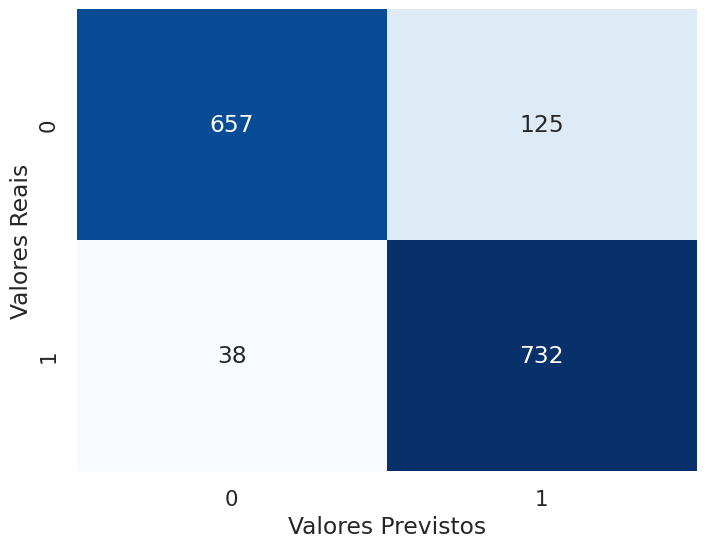

In [ ]:
matrix_confusao(modelo_RF)

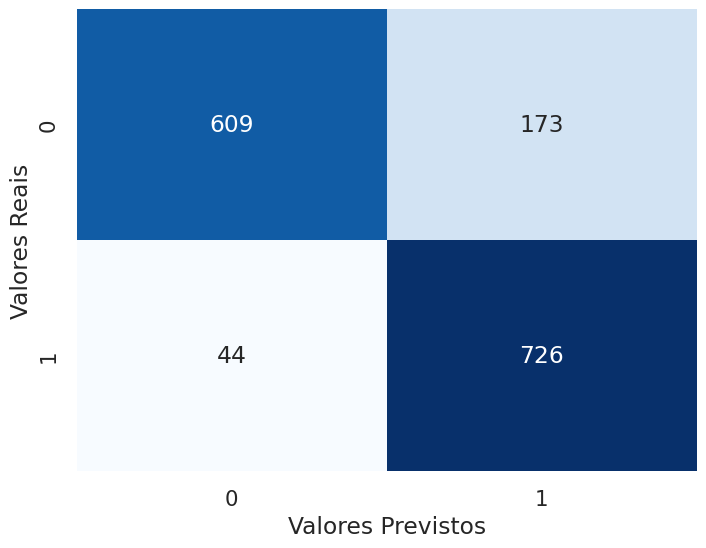

In [ ]:
matrix_confusao(modelo_RF2)

Com base nas métricas o modelo:
1. Aumentou a taxa corretamente classificar como evasor
2. Aumentou perda em 6 clientes, e classificamos menos não evasores
3. Diminuiu a taxa de Verdadeiro positivos.
* Com base nos resultados o modelo RF2 é o melhor modelo otimizado

Recall: 80% -> 81.1%

taxa perdido: 5.2% -> 6.74%

O modelo consegue prever melhor um possível evasor, com perdas de 6.7% (taxa de falso negativo).

# Otimização do GradientBoost
O melhor modelo dada estar acima da Baseline em Recall e Bussines:**Gradient Boost**

Este modelo será otimizado a seguir.

Média Acurácia Teste: 0.75

Média Precisão Teste: 0.73

Média Recall Teste: 0.79

taxa perdido: 18.67

taxa recuperado: 75.5

In [ ]:
SEED=42
np.random.seed(SEED)
# Colocar os default
espaco_de_parametros = {
    "loss" : ['log_loss','exponential'],
    "learning_rate": [0.1,0.2,0.5 ],
    "n_estimators": [100, 90, 110],
    "subsample": [0.1, 0.5, 1],
    "criterion":['friedman_mse', 'squared_error']}




busca = GridSearchCV(modelo_GB,
                    espaco_de_parametros,
                    cv = validador)

busca.fit(x_treino, y_treino)
print(busca.best_params_)
print(busca.best_score_ * 100)
busca.best_estimator_

{'criterion': 'squared_error', 'learning_rate': 0.5, 'loss': 'log_loss', 'n_estimators': 110, 'subsample': 1}
81.03413021585884


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           n_estimators=110, random_state=42, subsample=1)

In [ ]:

modelo_GB2 = GradientBoostingClassifier(criterion='squared_error', learning_rate=0.5,
                           n_estimators=110, subsample=1, random_state = SEED)
scores = cross_val_score(modelo_GB2, x_teste, y_teste, cv = KFold(n_splits=5, shuffle=True), scoring = make_scorer(recall_score))
print(f'Média: {round(scores.mean(),3)}, Desvio: {round(scores.std(),3)}')

metrica_bussines(modelo_GB2)

Média: 0.787, Desvio: 0.025
taxa perdido: 16.15 
taxa recuperado: 77.98


# Validação do modelo: RandomForest

In [ ]:
modelo_final = RandomForestClassifier(n_estimators=90,min_samples_split=2,max_depth= 12, random_state = SEED)
scores = cross_val_score(modelo_final, x_validacao, y_validacao, cv = KFold(n_splits=5, shuffle=True), scoring = make_scorer(recall_score))
print(f'Média: {round(scores.mean(),3)}, Desvio: {round(scores.std(),3)}')

Média: 0.813, Desvio: 0.027


In [ ]:
metrica_bussines(modelo_final)

taxa perdido: 6.74 
taxa recuperado: 80.76


## Resultados Validação:

Recall:81.3%

taxa perdido: 6.74%

# Salvar com Pickle

In [ ]:
import pickle

with open('modelo_Churn.pkl', 'wb') as arquivo:
    pickle.dump(modelo_final, arquivo)
